In [9]:
X = [185, 170, 168, 179, 182, 188]
Y = [72, 56, 60, 68, 72, 77]

#Multiplizar los 2 vectores
multi = 0
for i in range(len(X)):
    multi += X[i] * Y[i]

magnitud_X = 0
magnitud_Y = 0
#Calcular la longitud entre 2 vectores
for i in range(len(X)):
    magnitud_X += X[i] ** 2
    magnitud_Y += Y[i] ** 2

#Formula de similut de coseno
dist_coseno = multi / (sqrt(magnitud_X) * sqrt(magnitud_Y))

print("La Similitud de Coseno es :", dist_coseno)

La Similitud de Coseno es : 0.9976417631668109


In [8]:
from numpy import dot
from numpy.linalg import norm

X = [185, 170, 168, 179, 182, 188]
Y = [72, 56, 60, 68, 72, 77]
dist_coseno = dot(X, Y) / (norm(X) * norm(Y))
print("Similitud de coseno entre los dos vectores:", dist_coseno)

Similitud de coseno entre los dos vectores: 0.9976417631668109


Punto a evaluar  [168, 60]
Distancia Cluster 1:  0.0003955709644918315
Distancia Cluster 2:  0.00030767636283501876
Centroide Actualizado :  169.0 58.0
cluster 1 =  [[185, 72]]
cluster 2 = [[170, 56], [168, 60]]


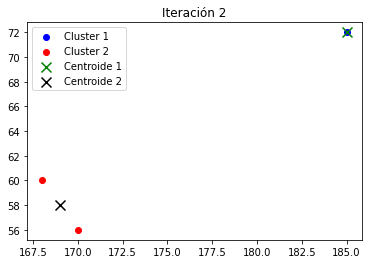

Punto a evaluar  [179, 68]
Distancia Cluster 1:  3.2827020134962304e-05
Distancia Cluster 2:  0.0005264385646911451
Centroide Actualizado :  182.0 70.0
cluster 1 =  [[185, 72], [179, 68]]
cluster 2 = [[170, 56], [168, 60]]


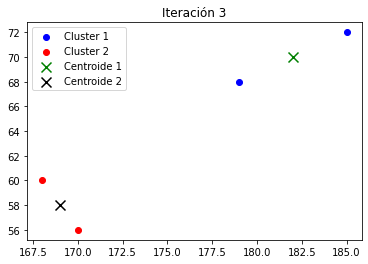

Punto a evaluar  [182, 72]
Distancia Cluster 1:  4.548156162365036e-05
Distancia Cluster 2:  0.0010629444566856439
Centroide Actualizado :  182.0 71.0
cluster 1 =  [[185, 72], [179, 68], [182, 72]]
cluster 2 = [[170, 56], [168, 60]]


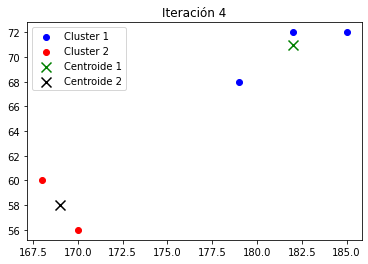

Punto a evaluar  [188, 77]
Distancia Cluster 1:  0.00014080488912804334
Distancia Cluster 2:  0.0016892471339506887
Centroide Actualizado :  185.0 74.0
cluster 1 =  [[185, 72], [179, 68], [182, 72], [188, 77]]
cluster 2 = [[170, 56], [168, 60]]


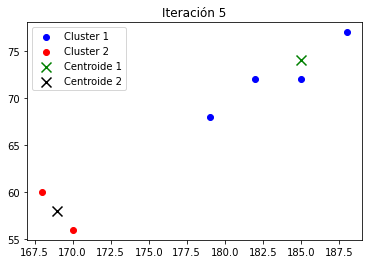

In [2]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

x = [185, 170, 168, 179, 182, 188]
y = [72, 56, 60, 68, 72, 77]

# Inicializando centroides
k1 = [185, 72]
k2 = [170, 56]

# Lista para almacenar el número de clúster al que pertenece cada punto
cluster_1 = [[185, 72]]
cluster_2 = [[170, 56]]

def distancia_coseno(punto1, punto2):
    dot_product = np.dot(punto1, punto2)
    norm_point1 = np.linalg.norm(punto1)
    norm_point2 = np.linalg.norm(punto2)
    return 1 - (dot_product / (norm_point1 * norm_point2))

def actualizar_centroide(punto, centroide):
    print("Centroide Actualizado : ",(punto[0] + centroide[0]) / 2,(punto[1] + centroide[1]) / 2)
    return [(punto[0] + centroide[0]) / 2, (punto[1] + centroide[1]) / 2]

# Agrupando
for i in range(2, len(x)):
    punto = [x[i], y[i]]
    print("Punto a evaluar ",punto)

    # Calculando la distancia del punto - centroide
    distancia_k1 = distancia_coseno(punto, k1)
    print("Distancia Cluster 1: " ,distancia_k1)
    distancia_k2 = distancia_coseno(punto, k2)
    print("Distancia Cluster 2: " ,distancia_k2)

    # Asignación el punto al clúster más cercano
    if distancia_k1 < distancia_k2:
        clustering = 1
        cluster_1.append(punto)
    else:
        clustering = 2
        cluster_2.append(punto)

    # Actualización de centroide
    if clustering == 1:
        k1 = actualizar_centroide(punto, k1)
    else:
        k2 = actualizar_centroide(punto, k2)

    print("cluster 1 = ",cluster_1)
    print("cluster 2 =",cluster_2)
    plt.figure()
    plt.scatter(*zip(*cluster_1), label="Cluster 1", c='blue')
    plt.scatter(*zip(*cluster_2), label="Cluster 2", c='red')
    plt.scatter(*k1, marker='x', s=100, c='green', label="Centroide 1")
    plt.scatter(*k2, marker='x', s=100, c='black', label="Centroide 2")
    plt.title(f'Iteración {i }')
    plt.legend()
    plt.show()